In [58]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
from sklearn.metrics import roc_curve
import warnings
import sys
sys.path
warnings.filterwarnings('ignore')



# 1. Loading Data:
The dataset is borrowed from Keystroke and swipe biometrics fusion to enhance smartphones authentication , Jaafer Al-Saraireh
,Mohammad Rasool AlJa'afreh ,Computers and SecurityVolume 125Issue C01 February 2023 , https://doi.org/10.1016/j.cose.2022.103022   

In [59]:
#Loading data into dataframe

data = pd.read_csv("C:\\Users\\Smart Tablets\\Desktop\\KEYSTROKE AUTHENTICATION PROJECT//DS/CORR.csv")
data.head()

,D5-DD,D7-DD,D7-UU,D7-DU,subject
0,0.004437,0.028638,0.049589,0.016023,1
1,0.004612,0.025491,0.077717,0.019228,1
2,0.004329,0.072319,0.035982,0.015910,1
3,0.003493,0.029204,0.039635,0.029797,1
4,0.004288,0.024862,0.038995,0.014280,1


# 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [60]:
#Shape of dataframe

data.shape

(22400, 5)

In [61]:
#Listing the features of the dataset

data.columns

Index(['D5-DD', 'D7-DD', 'D7-UU', 'D7-DU', 'subject'], dtype='object')

In [62]:
#Information about the dataset ,,,, NO MISSING VALUES ARE DETECTED 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   D5-DD    22400 non-null  float64
 1   D7-DD    22400 non-null  float64
 2   D7-UU    22400 non-null  float64
 3   D7-DU    22400 non-null  float64
 4   subject  22400 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 875.1 KB


In [63]:
# nunique value in columns

data.nunique()

D5-DD       8256
D7-DD      16433
D7-UU      17504
D7-DU      15851
subject       56
dtype: int64

In [64]:
#droping index column
alldata=data
#data = data.drop(['subject'],axis = 1)
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
D5-DD,22400.0,0.004843,0.011798,0.0,0.002386,0.003382,0.004887,1.0
D7-DD,22400.0,0.026478,0.023006,0.0,0.013674,0.024501,0.032293,1.0
D7-UU,22400.0,0.041714,0.030985,0.0,0.018462,0.042140,0.052539,1.0
D7-DU,22400.0,0.031964,0.047950,0.0,0.015656,0.021138,0.030461,1.0
subject,22400.0,28.500000,16.163591,1.0,14.750000,28.500000,42.250000,56.0


# 3. DataSet Observation 

There are 22400 instances and 83 fearures in dataset.
Out of which 82 are independent features where as 1 is dependent feature.
Each feature is in float datatype, so there is no need to use LabelEncoder.
There is no outlier present in dataset.
There is no missing value in dataset

# 4. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

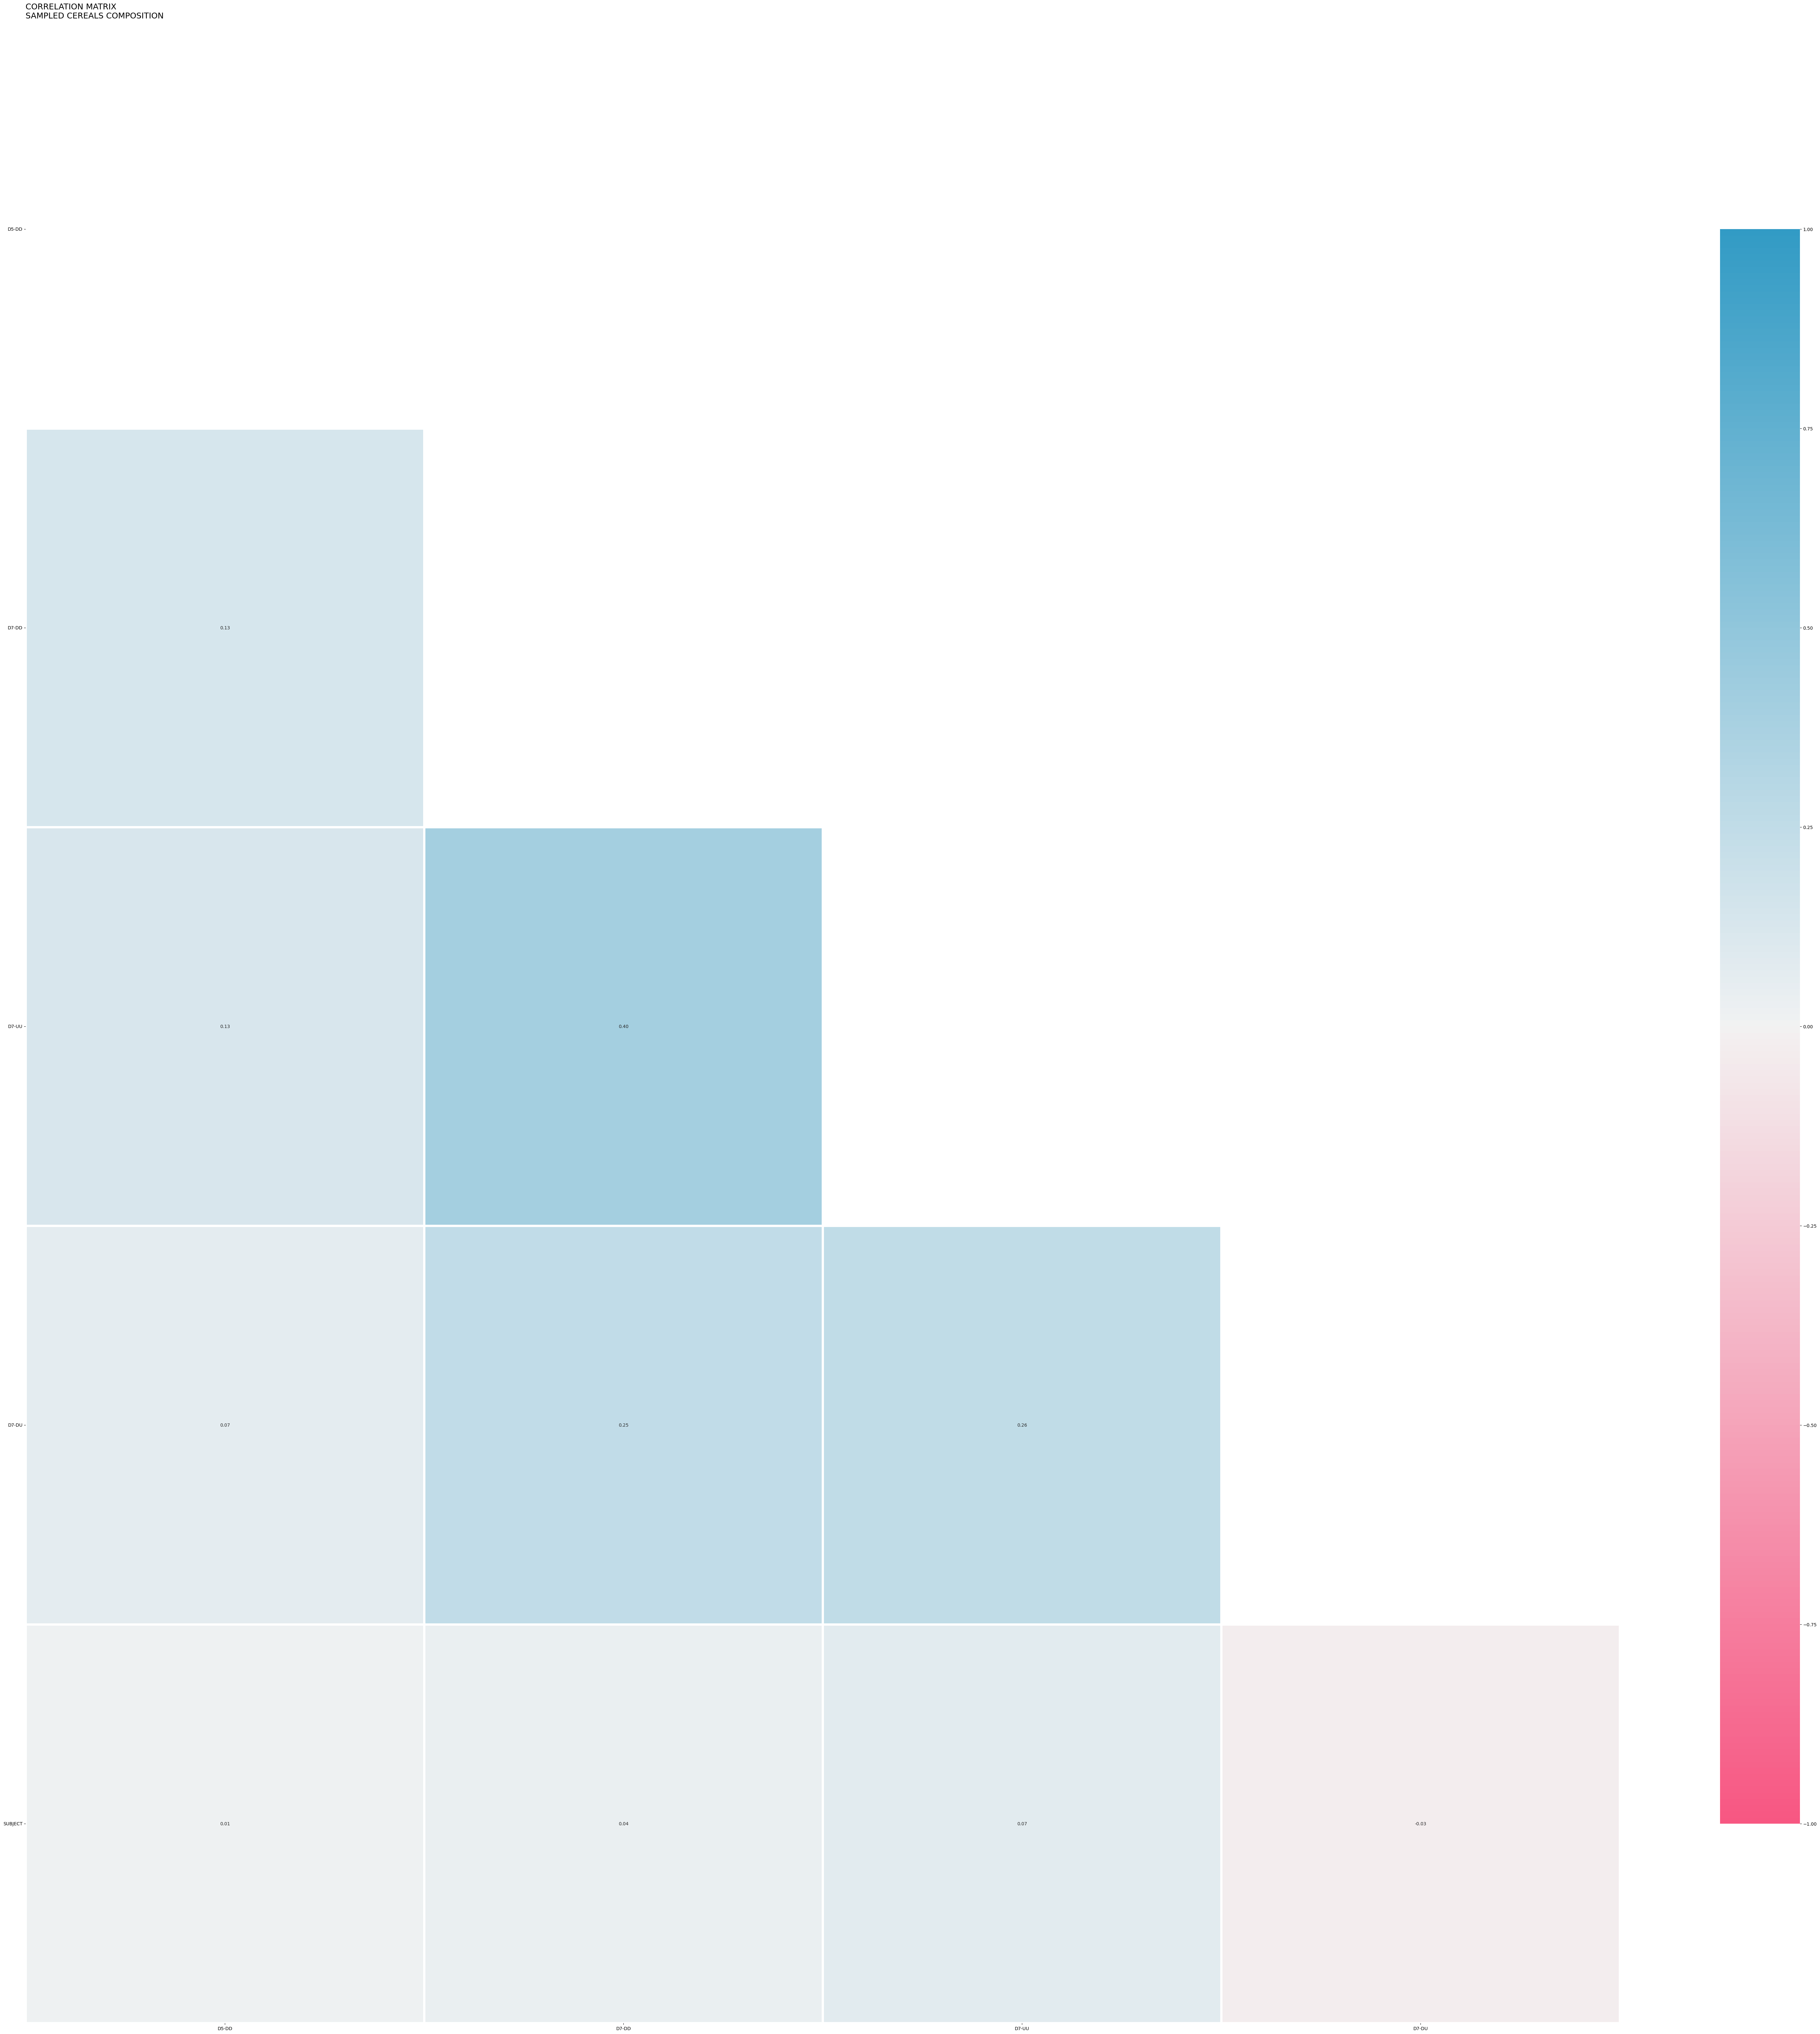

In [65]:
#Correlation heatmap


fig, ax = plt.subplots(figsize=(80, 80))
# mask
mask = np.triu(np.ones_like(alldata.corr(), dtype=np.bool))
# adjust mask and df
mask = mask[:, :-1]
corr = alldata.corr().iloc[:, :-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

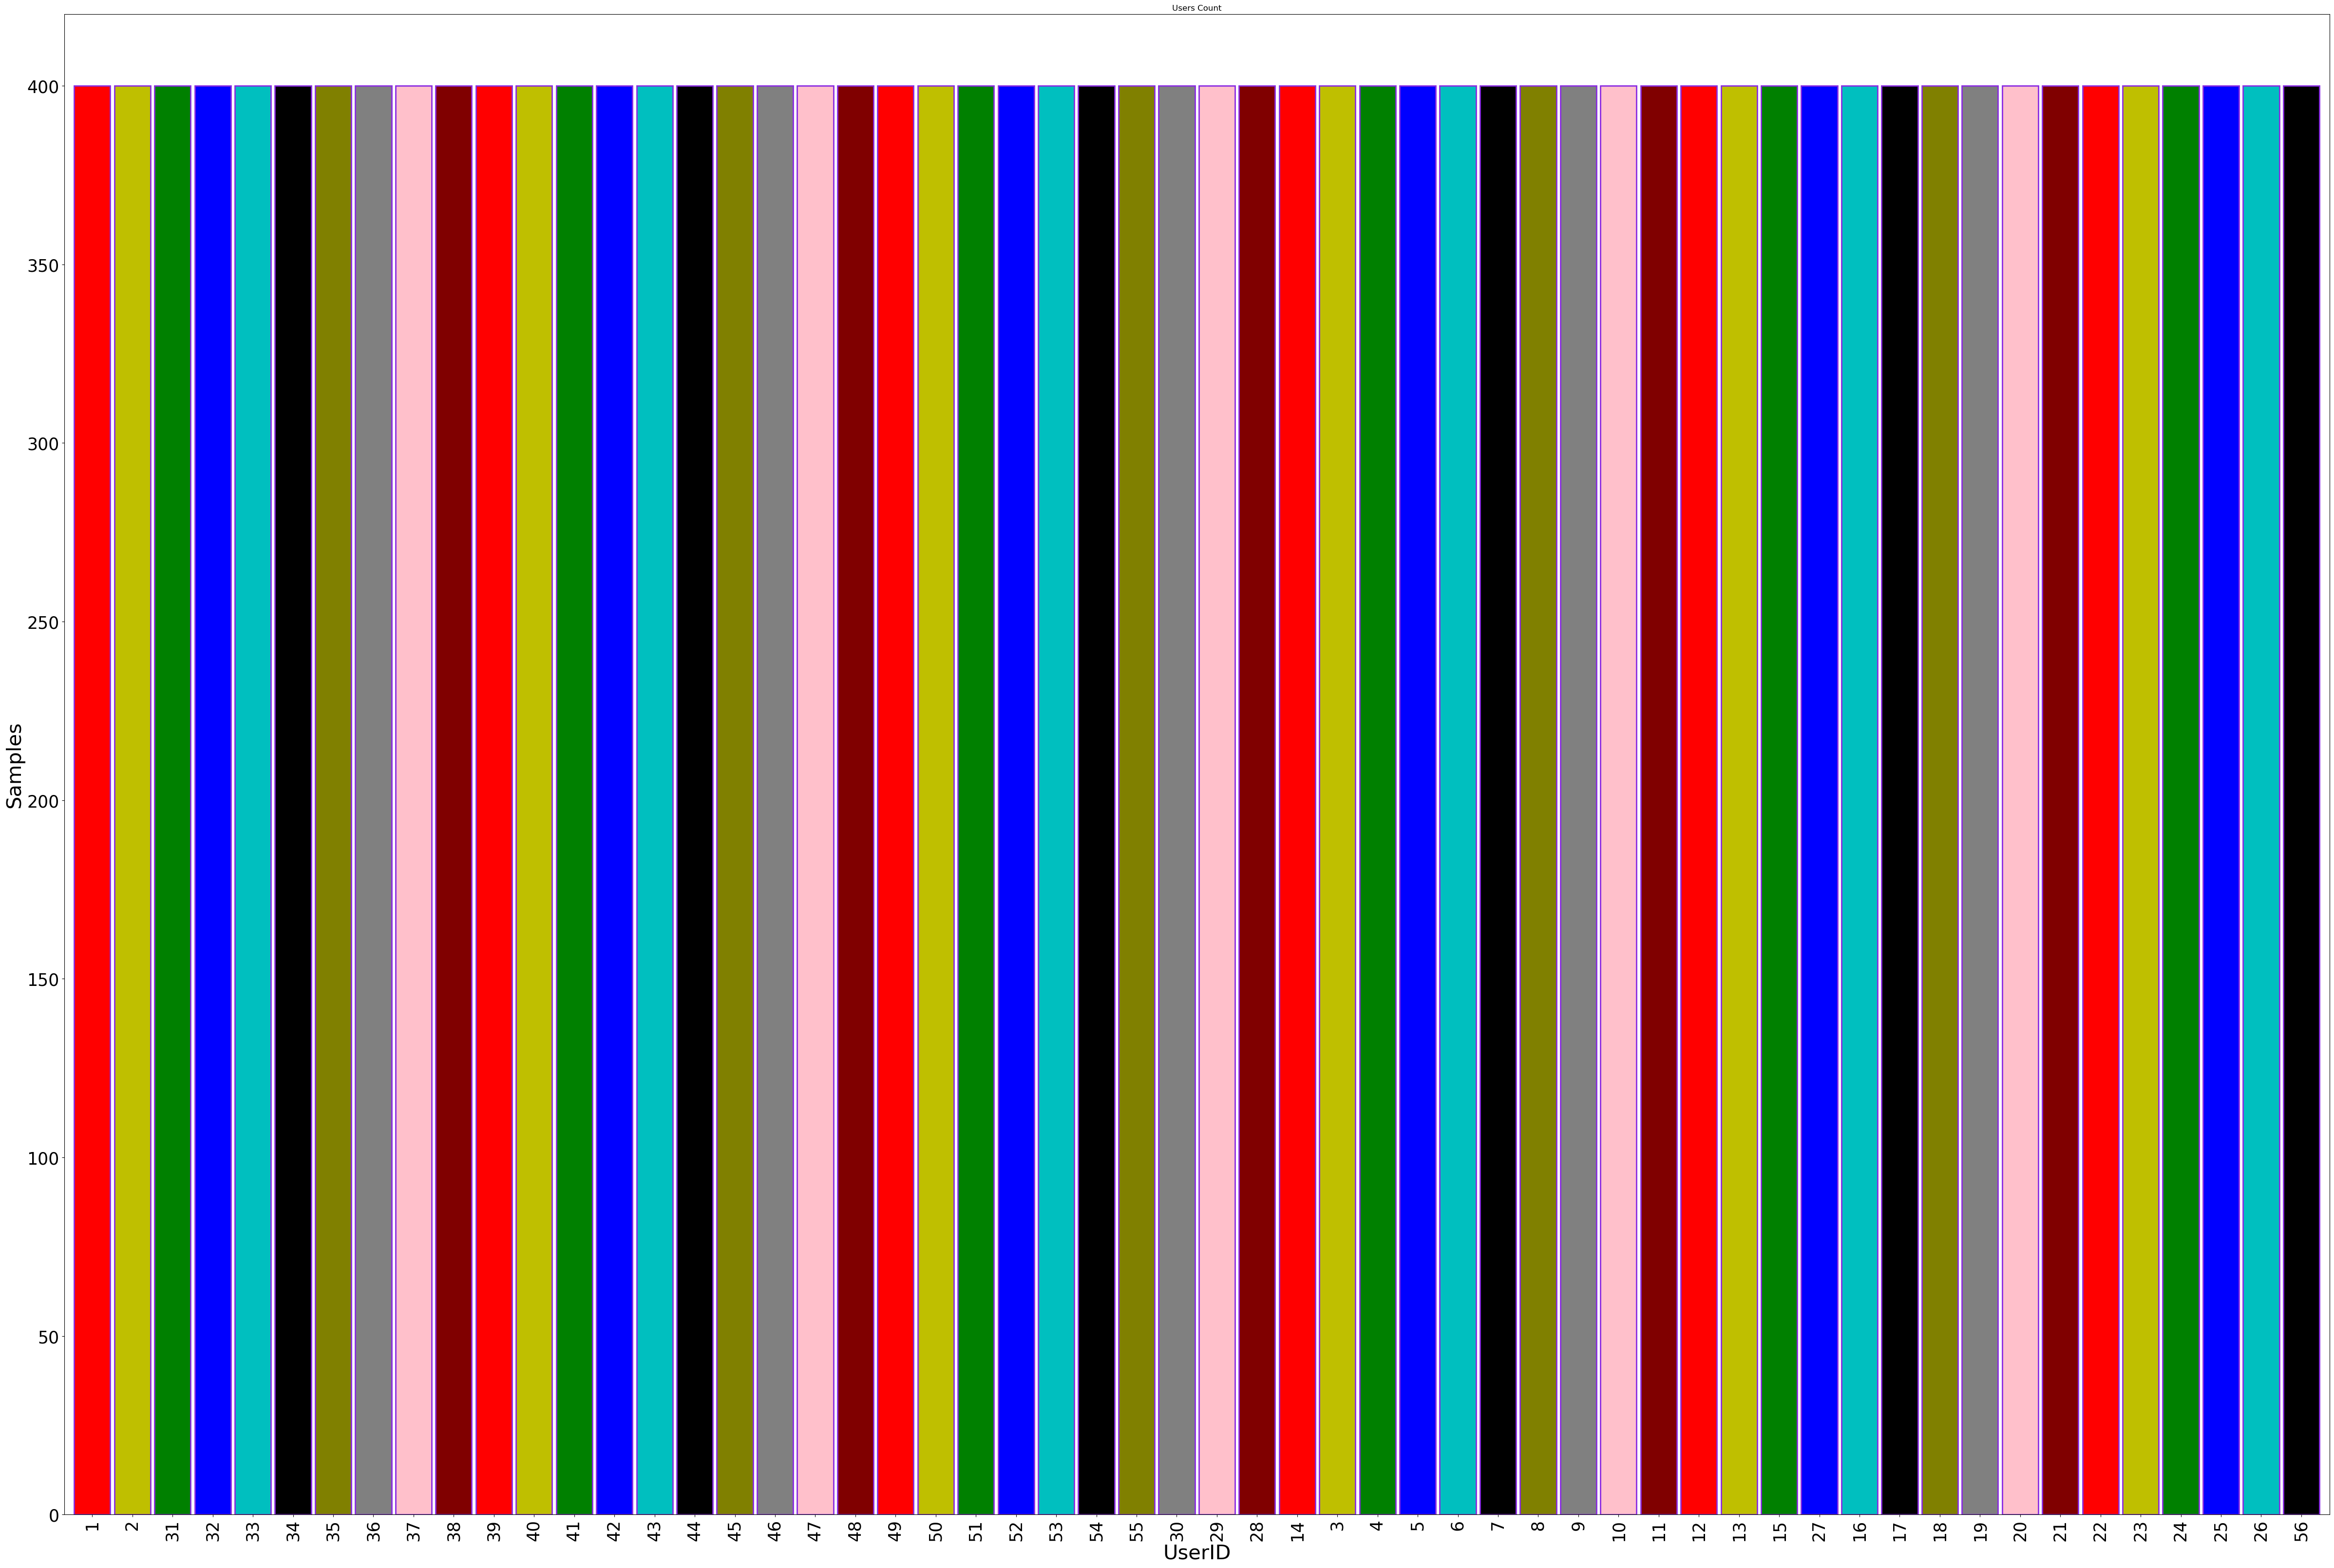

In [66]:
# Keystroke users Count in pie chart

alldata['subject'].value_counts().plot(kind='bar',figsize=[60, 40],fontsize=25,width=.9, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=2)
plt.title("Users Count")
plt.xlabel('UserID', fontsize=30)
plt.ylabel('Samples', fontsize=30)
plt.show()





# 5. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [67]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["subject"],axis =1)
y = data["subject"]
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17920, 4), (17920,), (4480, 4), (4480,))

# 6. Model Building & Training:
Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

Logistic Regression
k-Nearest Neighbors
Support Vector Clasifier
Naive Bayes
Decision Tree
Random Forest
Gradient Boosting
Catboost
Xgboost
Multilayer Perceptrons
The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [68]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))
 
    

# 6.1. Logistic Regression
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [69]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [70]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [71]:
#computing the accuracy, f1_score, Recall, precision, EER of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()
f1_score_train_log = metrics.f1_score(y_train,y_train_log, average='micro')
f1_score_test_log = metrics.f1_score(y_test,y_test_log,average='micro')
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log, average='micro')
recall_score_test_log = metrics.recall_score(y_test,y_test_log, average='micro')
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log, average='micro')
precision_score_test_log = metrics.precision_score(y_test,y_test_log, average='micro')
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))





Logistic Regression : Accuracy on training Data: 0.107
Logistic Regression : Accuracy on test Data: 0.106

Logistic Regression : f1_score on training Data: 0.107
Logistic Regression : f1_score on test Data: 0.106

Logistic Regression : Recall on training Data: 0.107
Logistic Regression : Recall on test Data: 0.106

Logistic Regression : precision on training Data: 0.107
Logistic Regression : precision on test Data: 0.106


In [72]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        82
           2       0.00      0.00      0.00        97
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        80
           5       0.00      0.00      0.00        82
           6       0.00      0.00      0.00        78
           7       0.24      0.59      0.34        83
           8       0.00      0.00      0.00        92
           9       0.00      0.00      0.00        80
          10       0.00      0.00      0.00        98
          11       0.00      0.00      0.00        81
          12       0.89      0.10      0.18        79
          13       0.05      0.68      0.09        69
          14       0.00      0.00      0.00        76
          15       0.30      0.04      0.06        84
          16       0.00      0.00      0.00        83
          17       0.00      0.00      0.00        92
          18       0.00    

In [73]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

# 6.2. K-Nearest Neighbors : Classifier
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [74]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)

In [75]:
# fit the model 
knn.fit(X_train,y_train)
KNeighborsClassifier(n_neighbors=1)
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [76]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn, average='micro')
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn, average='micro')
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn, average='micro')
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn, average='micro')
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn, average='micro')
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn, average='micro')
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.606
K-Nearest Neighbors : Accuracy on test Data: 0.458

K-Nearest Neighbors : f1_score on training Data: 0.606
K-Nearest Neighbors : f1_score on test Data: 0.458

K-Nearest Neighborsn : Recall on training Data: 0.606
Logistic Regression : Recall on test Data: 0.458

K-Nearest Neighbors : precision on training Data: 0.606
K-Nearest Neighbors : precision on test Data: 0.458


In [77]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))
    

              precision    recall  f1-score   support

           1       0.41      0.48      0.44        82
           2       0.57      0.49      0.53        97
           3       0.18      0.27      0.22        86
           4       0.46      0.64      0.53        80
           5       0.63      0.55      0.59        82
           6       0.41      0.50      0.45        78
           7       0.56      0.82      0.67        83
           8       0.44      0.37      0.40        92
           9       0.39      0.59      0.47        80
          10       0.51      0.51      0.51        98
          11       0.54      0.68      0.60        81
          12       0.46      0.48      0.47        79
          13       0.47      0.51      0.49        69
          14       0.27      0.39      0.32        76
          15       0.64      0.75      0.69        84
          16       0.27      0.36      0.31        83
          17       0.37      0.50      0.43        92
          18       0.20    

In [78]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

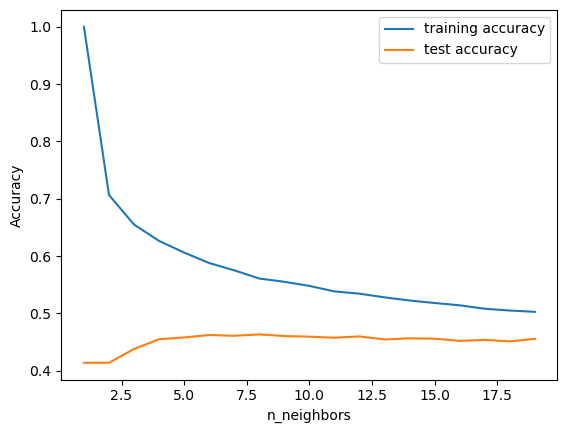

In [79]:
#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [80]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

# 6.3. Support Vector Machine : Classifier
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [81]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [82]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [83]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc, average='micro')
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc, average='micro')
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc, average='micro')
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc, average='micro')
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc, average='micro')
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc, average='micro')
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.053
Support Vector Machine : Accuracy on test Data: 0.045

Support Vector Machine : f1_score on training Data: 0.053
Support Vector Machine : f1_score on test Data: 0.045

Support Vector Machine : Recall on training Data: 0.053
Support Vector Machine : Recall on test Data: 0.045

Support Vector Machine : precision on training Data: 0.053
Support Vector Machine : precision on test Data: 0.045


In [84]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        82
           2       0.00      0.00      0.00        97
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        80
           5       0.00      0.00      0.00        82
           6       0.00      0.00      0.00        78
           7       0.25      0.05      0.08        83
           8       0.00      0.00      0.00        92
           9       0.00      0.00      0.00        80
          10       0.00      0.00      0.00        98
          11       0.00      0.00      0.00        81
          12       0.00      0.00      0.00        79
          13       0.10      0.01      0.03        69
          14       0.00      0.00      0.00        76
          15       0.00      0.00      0.00        84
          16       0.00      0.00      0.00        83
          17       0.00      0.00      0.00        92
          18       0.00    

In [85]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

# 6.4. Naive Bayes : Classifier
Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [86]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [87]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [88]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb,average='micro')
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb,average='micro')
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb,average='micro')
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb,average='micro')
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb,average='micro')
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb,average='micro')
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.303
Naive Bayes Classifier : Accuracy on test Data: 0.315

Naive Bayes Classifier : f1_score on training Data: 0.303
Naive Bayes Classifier : f1_score on test Data: 0.315

Naive Bayes Classifier : Recall on training Data: 0.303
Naive Bayes Classifier : Recall on test Data: 0.315

Naive Bayes Classifier : precision on training Data: 0.303
Naive Bayes Classifier : precision on test Data: 0.315


In [89]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        82
           2       0.00      0.00      0.00        97
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        80
           5       0.00      0.00      0.00        82
           6       0.00      0.00      0.00        78
           7       0.25      0.05      0.08        83
           8       0.00      0.00      0.00        92
           9       0.00      0.00      0.00        80
          10       0.00      0.00      0.00        98
          11       0.00      0.00      0.00        81
          12       0.00      0.00      0.00        79
          13       0.10      0.01      0.03        69
          14       0.00      0.00      0.00        76
          15       0.00      0.00      0.00        84
          16       0.00      0.00      0.00        83
          17       0.00      0.00      0.00        92
          18       0.00    

In [90]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

# 6.5. Decision Trees : Classifier
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [91]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [92]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=5)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [93]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [94]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree,average='micro')
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree,average='micro')
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree,average='micro')
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree,average='micro')
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree,average='micro')
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree,average='micro')
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.446

Decision Tree : f1_score on training Data: 1.000
Decision Tree : f1_score on test Data: 0.446

Decision Tree : Recall on training Data: 1.000
Decision Tree : Recall on test Data: 0.446

Decision Tree : precision on training Data: 1.000
Decision Tree : precision on test Data: 0.446


In [95]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           1       0.58      0.55      0.57        82
           2       0.55      0.42      0.48        97
           3       0.20      0.19      0.19        86
           4       0.44      0.47      0.46        80
           5       0.69      0.61      0.65        82
           6       0.39      0.44      0.41        78
           7       0.76      0.72      0.74        83
           8       0.44      0.39      0.41        92
           9       0.45      0.41      0.43        80
          10       0.50      0.52      0.51        98
          11       0.53      0.56      0.54        81
          12       0.40      0.42      0.41        79
          13       0.43      0.46      0.45        69
          14       0.25      0.24      0.24        76
          15       0.67      0.71      0.69        84
          16       0.26      0.23      0.24        83
          17       0.40      0.39      0.40        92
          18       0.28    

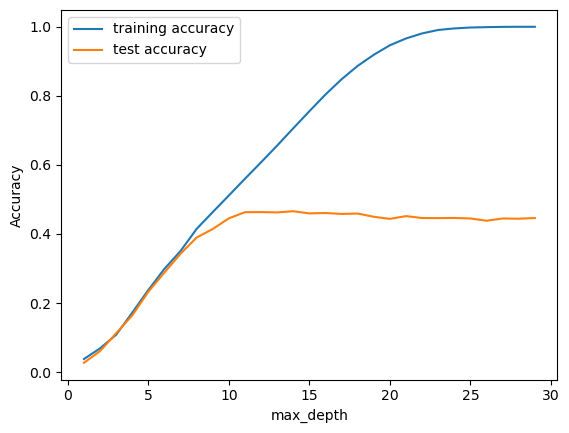

In [96]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [97]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

# 6.6. Random Forest : Classifier
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [98]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=100)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier()

In [99]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [100]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest,average='micro')
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest,average='micro')
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest,average='micro')
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest,average='micro')
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest,average='micro')
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree,average='micro')
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 1.000
Random Forest : Accuracy on test Data: 0.552

Random Forest : f1_score on training Data: 1.000
Random Forest : f1_score on test Data: 0.552

Random Forest : Recall on training Data: 1.000
Random Forest : Recall on test Data: 0.552

Random Forest : precision on training Data: 1.000
Random Forest : precision on test Data: 0.446


In [101]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           1       0.72      0.66      0.69        82
           2       0.72      0.49      0.59        97
           3       0.35      0.19      0.24        86
           4       0.60      0.66      0.63        80
           5       0.76      0.68      0.72        82
           6       0.48      0.58      0.53        78
           7       0.75      0.84      0.80        83
           8       0.64      0.53      0.58        92
           9       0.56      0.61      0.59        80
          10       0.69      0.58      0.63        98
          11       0.58      0.77      0.66        81
          12       0.58      0.53      0.56        79
          13       0.57      0.61      0.59        69
          14       0.37      0.45      0.40        76
          15       0.74      0.83      0.79        84
          16       0.34      0.30      0.32        83
          17       0.46      0.54      0.50        92
          18       0.33    

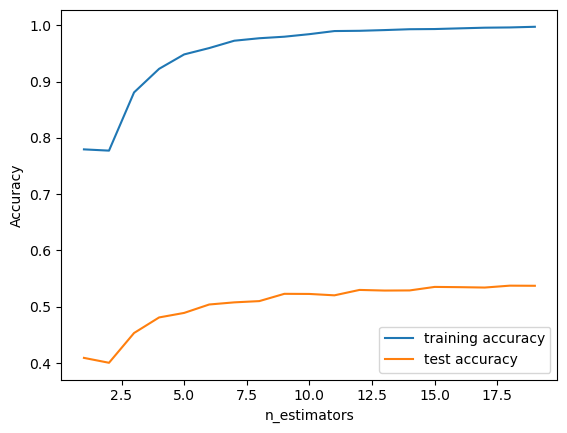

In [102]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [103]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

# 6.7. Multi-layer Perceptron classifier
MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

In [104]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [105]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [106]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp,average='micro')
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp,average='micro')
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp,average='micro')
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.371
Multi-layer Perceptron : Accuracy on test Data: 0.379

Multi-layer Perceptron : f1_score on training Data: 0.371
Multi-layer Perceptron : f1_score on test Data: 0.371

Multi-layer Perceptron : Recall on training Data: 0.371
Multi-layer Perceptron : Recall on test Data: 0.379

Multi-layer Perceptron : precision on training Data: 0.371
Multi-layer Perceptron : precision on test Data: 0.379


In [107]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

# 6.8 . XGBoost Classifier
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [108]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(num_class=56,learning_rate=0.1,num_iterations=10,max_depth=10,feature_fraction=0.7,scale_pos_weight=1.5,boosting='gbdt',metric='multiclass',eval_metric='mlogloss')
#y_train = le.fit_transform(y_train)
#y_test = le.fit_transform(y_test)
# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(boosting='gbdt', eval_metric='mlogloss', feature_fraction=0.7,
              max_depth=10, metric='multiclass', num_class=56,
              num_iterations=10, objective='multi:softprob',
              scale_pos_weight=1.5)

In [109]:
#predicting the target value from the model for the samples

y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [110]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb,average='micro')
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb,average='micro')
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb,average='micro')
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb,average='micro')
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb,average='micro')
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb,average='micro')
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.958
XGBoost Classifier : Accuracy on test Data: 0.561

XGBoost Classifier : f1_score on training Data: 0.958
XGBoost Classifier : f1_score on test Data: 0.561

XGBoost Classifier : Recall on training Data: 0.958
XGBoost Classifier : Recall on test Data: 0.958

XGBoost Classifier : precision on training Data: 0.958
XGBoost Classifier : precision on test Data: 0.958


In [111]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

# 7. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [112]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.106,0.106,0.107,0.107
1,K-Nearest Neighbors,0.458,0.458,0.606,0.606
2,Support Vector Machine,0.045,0.045,0.053,0.053
3,Naive Bayes Classifier,0.315,0.315,0.303,0.303
4,Decision Tree,0.446,0.446,1.000,1.000
5,Random Forest,0.552,0.552,1.000,1.000
6,Multi-layer Perceptron,0.379,0.379,0.371,0.371
7,XGBoost Classifier,0.561,0.561,0.958,0.958


In [113]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,XGBoost Classifier,0.561,0.561,0.958,0.958
1,Random Forest,0.552,0.552,1.000,1.000
2,K-Nearest Neighbors,0.458,0.458,0.606,0.606
3,Decision Tree,0.446,0.446,1.000,1.000
4,Multi-layer Perceptron,0.379,0.379,0.371,0.371
5,Naive Bayes Classifier,0.315,0.315,0.303,0.303
6,Logistic Regression,0.106,0.106,0.107,0.107
7,Support Vector Machine,0.045,0.045,0.053,0.053
